In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
import plotly.express as px #as like seaborn
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go #as like matplotlib
import plotly.tools as tls
import folium
import folium.plugins

from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML,display

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [3]:
data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO=8859-1')

In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
data.isna().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [7]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data['casualities']=data['Killed']+data['Wounded']
data.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [8]:
data.isna().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [9]:
print(f'Country with Highest Terrorist Attacks {data.Country.value_counts().index[0]}')
print(f'Regions with Highest Terrorist Attacks {data.Region.value_counts().index[0]}')
print(f'Maximum people killed in an attack are {data.Killed.max()} that took place in {data[data.Killed==data.Killed.max()].Country.values[0]} in the year {data[data.Killed==data.Killed.max()].Year.value_counts()}')
print(f'Year in which maximum no. Of terror attecks happend is {data.Year.value_counts().index[0]}')

Country with Highest Terrorist Attacks Iraq
Regions with Highest Terrorist Attacks Middle East & North Africa
Maximum people killed in an attack are 1570.0 that took place in Iraq in the year 2014    1
Name: Year, dtype: int64
Year in which maximum no. Of terror attecks happend is 2014


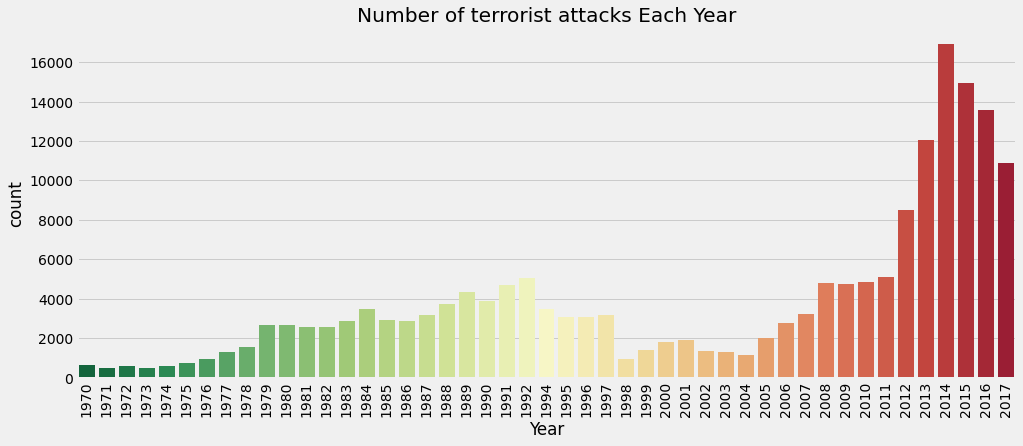

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette='RdYlGn_r')
plt.xticks(rotation=90)
plt.title('Number of terrorist attacks Each Year')
plt.show()

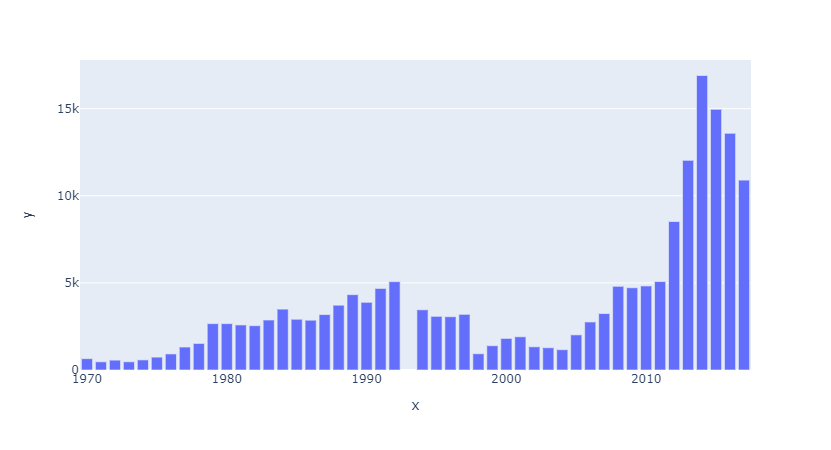

In [11]:
fig=px.bar(data,x=data.Year.value_counts().index,y=data.Year.value_counts().values)
fig.show()

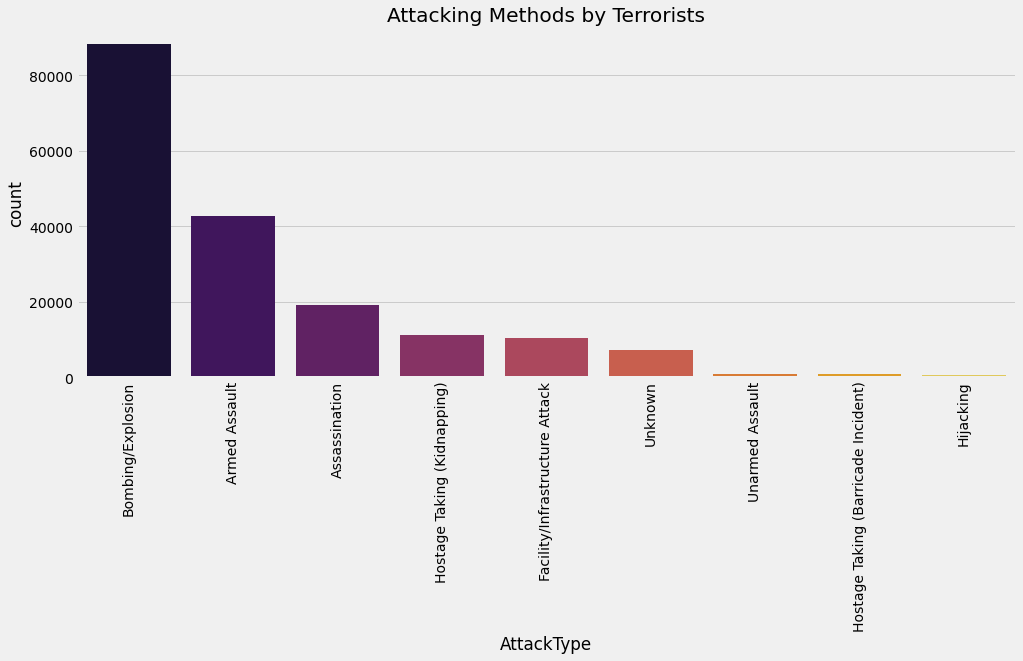

In [12]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=data,palette='inferno',order=data['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

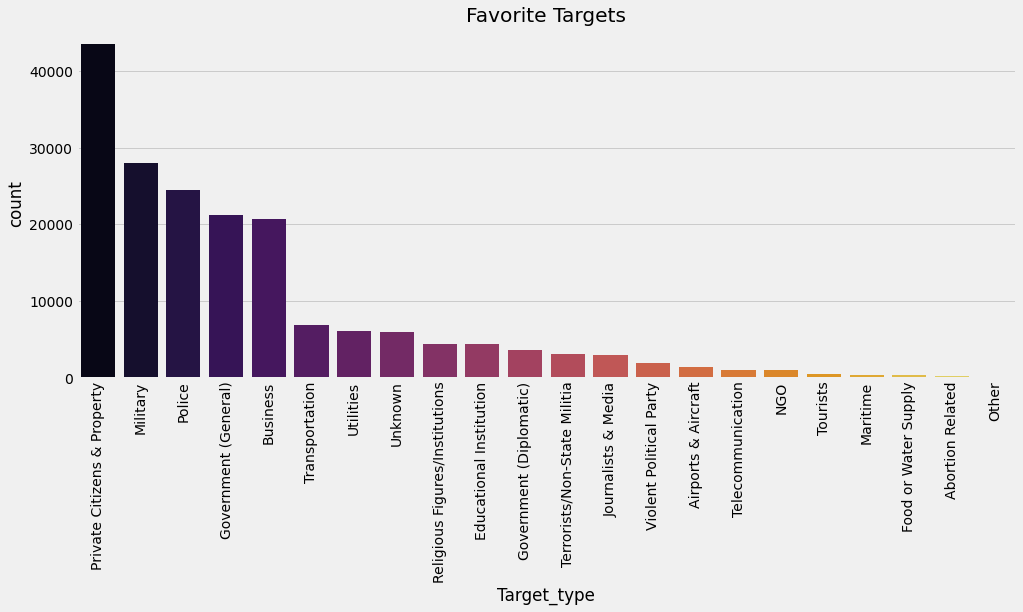

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot(data['Target_type'],palette='inferno',order=data['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

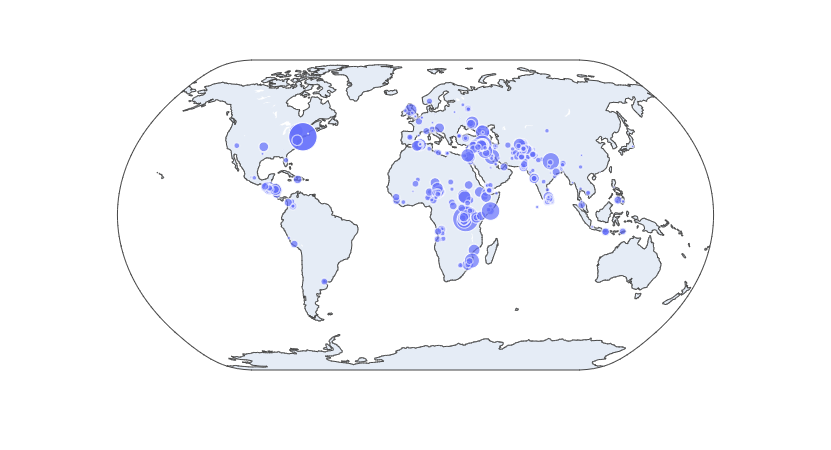

In [14]:
fig=px.scatter_geo(data[data.casualities>=100],lat='latitude',lon='longitude',size='Killed',projection='natural earth',hover_name='Country')
fig.show()

In [15]:
# fig = plt.figure(figsize=(15,10))
# reg = data['Region'].value_counts()
# sizes = [reg]
# plt.pie(sizes,shadow=True)
# plt.axis('equal')

# plt.legend()

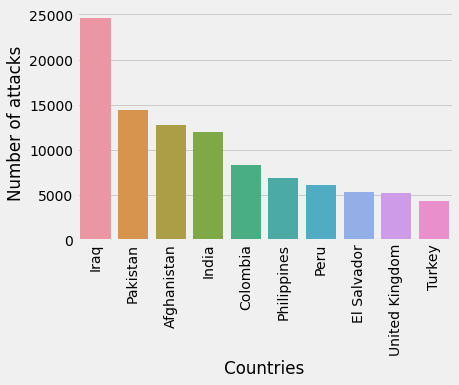

In [16]:
#Most Affected Countries
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values)
plt.xlabel('Countries')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 90)
plt.show()

In [17]:
big = data.groupby(['Killed'])['Group','Country','Year','Target_type'].max().sort_values(by='Killed',ascending=False).iloc[0:10]
big

,Group,Country,Year,Target_type
Killed,,,,
1570.0,Islamic State of Iraq and the Levant (ISIL),Iraq,2014,Military
1384.0,Al-Qaida,United States,2001,Private Citizens & Property
1383.0,Al-Qaida,United States,2001,Private Citizens & Property
1180.0,Hutu extremists,Rwanda,1994,Private Citizens & Property
953.0,Islamic State of Iraq and the Levant (ISIL),Iraq,2014,Private Citizens & Property
670.0,Islamic State of Iraq and the Levant (ISIL),Iraq,2014,Police
588.0,Al-Shabaab,Somalia,2017,Business
518.0,Communist Party of Nepal- Maoist (CPN-M),Nepal,2004,Government (General)
517.0,Islamic State of Iraq and the Levant (ISIL),Syria,2014,Military


In [18]:
g = data.groupby(['Killed'])['Group','Country','Year','Target_type']
g

In [19]:
data.head(2)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0


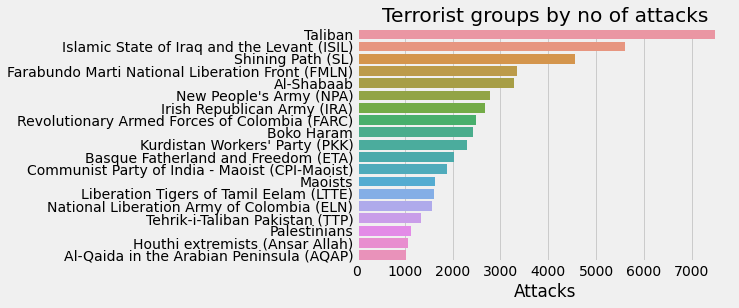

In [20]:
sns.barplot(data['Group'].value_counts()[1:20].values,data['Group'].value_counts()[1:20].index)
plt.xlabel("Attacks")
plt.title("Terrorist groups by no of attacks")
plt.show()

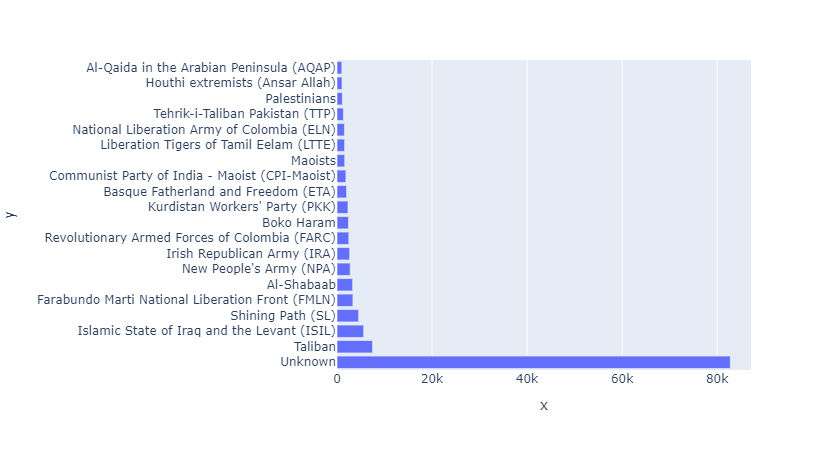

In [21]:
fig=px.bar(data,x=data.Group.value_counts()[0:20].values,y=data.Group.value_counts()[0:20].index,)
fig.show()

In [22]:
data.groupby('Group').count()['Killed']['Taliban']

7200

<AxesSubplot:>

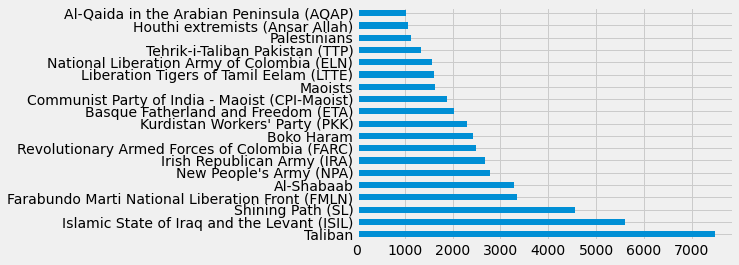

In [23]:
data.Group.value_counts()[1:20].plot(kind='barh')

In [24]:
data.head(2)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0


In [25]:
data.groupby(['Group']).Year.count()

Group
1 May                                    10
14 K Triad                                4
14 March Coalition                        1
14th of December Command                  3
15th of September Liberation Legion       1
                                         ..
Zulu Miners                               1
Zuwar al-Imam Rida                        1
Zviadists                                 1
Zwai Tribe                                1
leftist guerrillas-Bolivarian militia     1
Name: Year, Length: 3537, dtype: int64

In [26]:
# plt.bar(data.groupby(['Group'])['Year'].count().index,data.groupby(['Group'])['Year'].count().values)
# plt.show()

<AxesSubplot:ylabel='Group'>

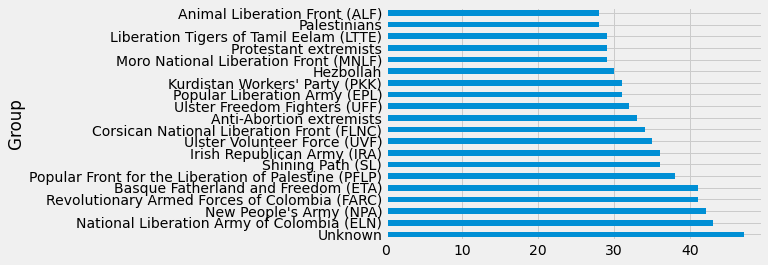

In [27]:
kill=pd.crosstab(data.Year,data.Group)
kill.astype(bool).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='barh')

In [28]:
kill.astype(bool).sum(axis=0)

Group
1 May                                    3
14 K Triad                               1
14 March Coalition                       1
14th of December Command                 1
15th of September Liberation Legion      1
                                        ..
Zulu Miners                              1
Zuwar al-Imam Rida                       1
Zviadists                                1
Zwai Tribe                               1
leftist guerrillas-Bolivarian militia    1
Length: 3537, dtype: int64

In [29]:
pd.util.testing.makeMixedDataFrame().head()

,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


In [30]:
kill=pd.crosstab(data.Year,data.Group)
kill

Group,1 May,14 K Triad,14 March Coalition,14th of December Command,15th of September Liberation Legion,16 January Organization for the Liberation of Tripoli,1920 Revolution Brigades,19th of July Christian Resistance Brigade,1st of May Group,2 April Group,20 December Movement (M-20),22 May 1948,23 May Democratic Alliance (Algeria),23rd of September Communist League,28 February Armed Group,28 May Armenian Organization,28s,28th of December Group,2nd of June Movement,31 January People's Front (FP-31),313 Brigade (Syria),4 August National Organization,7 April Libyan Organization,9 February,9 May People's Liberation Force,A Resistance Group,A'chik Matgrik Elite Force (AMEF),AFB,AGEL,ATALA,Aba Cheali Group,Abbala extremists,Abd al-Krim Commandos,Abdul Ghani Kikli Militia,Abdul Qader Husseini Battalions of the Free Palestine movement,Abdullah Azzam Brigades,Abida Tribe,Abkhazian Separatists,Abkhazian guerrillas,Abstentionist Brigades,Abu Abbas Brigade,Abu Amarah Battalion,Abu Bakr Unis Jabr Brigade,Abu Hassan,Abu Jaafar al-Mansur Brigades,Abu Musa Group,Abu Nidal Organization (ANO),Abu Obaida bin Jarrah Brigade,Abu Salim Martyr's Brigade,Abu Sayyaf Group (ASG),Abu Tira (Central Reserve Forces),Aceh Singkil Islamic Care Youth Students Association (PPI),Achik Matgrik Army (AMA),Achik National Cooperative Army (ANCA),Achik National Liberation Army (ANLA),Achik National Volunteer Council (ANVC),Achik National Volunteer Council-B (ANVC-B),Achik Songna An'pachakgipa Kotok (ASAK),Achik Tiger Force,Achwan-I-Mushbani,Actiefront Nationalistisch Nederland,Action Directe,Action Front Nationalist Librium,Action Front for the Liberation of the Baltic Countries,Action Group for Communism,Action Group for the Destruction of the Police State,Action Squad,Action Struggle Against the World,Active Espirit de Corps of the Argentina Army,Activists,Adan Abyan Islamic Army (AAIA),Adan-Abyan Province of the Islamic State,Adivasi Cobra Militants of Assam (ACMA),Adivasi National Liberation Army (ANLA),Adivasi People's Army (APA),Afar Revolutionary Democratic Unity Front,Afar rebels,Afghan Guerrillas,Afghan Merceneries,Afghan Mujahideen,Afghan Rebels,Afghan Revolutionary Front,Afghan War Veterans,Afghans,Africa Marine Commando,African National Congress (South Africa),African-American extremists,Afridi Tribe,Afrikaner Resistance Movement (AWB),"Aghwar ""Fire War"" Group",Agudat Israel Party,Agwelek Forces,Ahfad al-Sahaba-Aknaf Bayt al-Maqdis,Ahle Sunnat Wal Jamaat (ASWJ-Pakistan),Ahlu-sunah Wal-jamea (Somalia),Ahmad Alawi al Muqbili,Ahmad Jibril,Ahmad Luebaesa Group,Ahneish Militia,Ahrar Al-Jalil (Free People of the Galilee),Ahrar al-Sham,Aibed Er-Rahman katibet,Aidid Militia,Air and Azawak Liberation Front,Airport Protesters,Aisha Umm-al Mouemeneen (Brigades of Aisha),Aitarak Militia,Ajnad Misr,Ajnad al-Sham,Akali Dal Party,Akhil Terai Mukti Morcha (ATMM),Akhilesh Singh Gang,Al Bayda Province of the Islamic State,Al Zawahiri Loyalists,Al-Adl Wal Ihsane,Al-Ahwaz Arab People's Democratic Front,Al-Aqsa Martyrs Brigade,Al-Aqsa-Group,Al-Arifeen,Al-Ashtar Brigades,Al-Badr,Al-Bakazim,Al-Borkan Liberation Organization,Al-Da'wah Party,Al-Fajr,Al-Faran,Al-Faruo Battalion,Al-Faruq Militia,Al-Fatah,Al-Fateh Al-Jadid,Al-Fatihin Army (AFA),Al-Furqan (Tunisia),Al-Furqan Brigades,Al-Gama'at al-Islamiyya (IG),Al-Hadid,Al-Hamas Mujahideen,Al-Haramayn Brigades,Al-Haydariyah Battalion,Al-Herak Al-Tihami Movement,Al-Intiqami al-Pakistani,Al-Islah Party,Al-Ittihaad al-Islami (AIAI),Al-Jehad,Al-Jihad (Pakistan),Al-Jub Tribe,Al-Khobar,Al-Ma'unah,Al-Madani Brigade,Al-Madina,Al-Mansoorian,Al-Marabitun Revolutionary Committee,Al-Masni Tribe,Al-Mua'qi'oon Biddam Brigade (Those who Sign with Blood),Al-Mujahedin Brigades (Palestine),Al-Mus'abi Tribe,Al-Naqshabandiya Army,Al-Nasir Army (Syria),Al-Nasireen Group,Al-Nasirin (India),Al-Nawaz,Al-Nusrah Front,Al-Qaida,Al-Qaida Kurdish Battalions (AQKB),Al-Qaida Network for Southwestern Khulna Division,Al-Qaida Organization for Jihad in Sweden,Al-Q

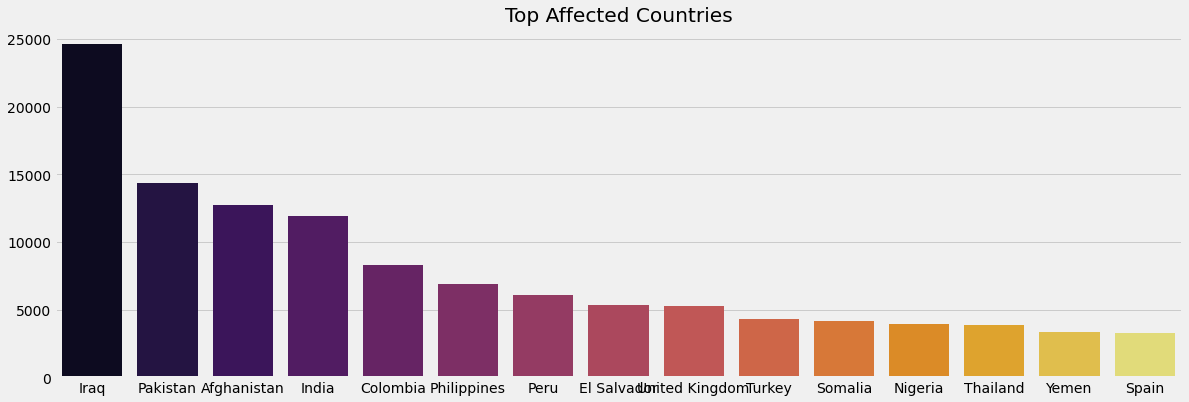

In [31]:
plt.subplots(figsize=(18,6))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

In [34]:
### analysis for india....In india how many attacks from 1970 to 2017 in which years terrorists attacks happend which group how many people killed 
### use plotly dash 

In [35]:
data.head(2)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0


In [42]:
india_data=data[data['Country']=='India']
india_data.head(2)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1186,1972,2,22,India,South Asia,New Delhi,28.585836,77.153336,Hijacking,0.0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,0.0
2764,1975,1,2,India,South Asia,Samastipur,25.863042,85.781004,Bombing/Explosion,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown,4.0


In [43]:
india_data.Year.count()

11960

In [45]:
india_data.Year.value_counts()

2016    1025
2017     966
2015     884
2014     860
2013     694
2009     672
2010     663
2011     645
2012     611
2008     534
1988     358
1990     349
1991     339
1989     324
1992     237
2001     234
1996     213
2003     196
1997     193
2002     184
2000     180
1995     179
2006     167
1987     166
1984     159
2007     149
2005     146
1999     112
2004     108
1994     107
1986      96
1998      61
1983      47
1985      39
1979      20
1981      16
1982      13
1980      10
1972       1
1977       1
1975       1
1976       1
Name: Year, dtype: int64

In [46]:
india_data.Group.value_counts()

Unknown                                                              4263
Communist Party of India - Maoist (CPI-Maoist)                       1877
Maoists                                                              1396
Sikh Extremists                                                       710
United Liberation Front of Assam (ULFA)                               357
Hizbul Mujahideen (HM)                                                199
Lashkar-e-Taiba (LeT)                                                 187
National Democratic Front of Bodoland (NDFB)                          174
Garo National Liberation Army                                         166
Muslim Separatists                                                    118
People's War Group (PWG)                                               97
National Socialist Council of Nagaland-Isak-Muivah (NSCN-IM)           89
People's Liberation Army (India)                                       88
Bodo Militants                        

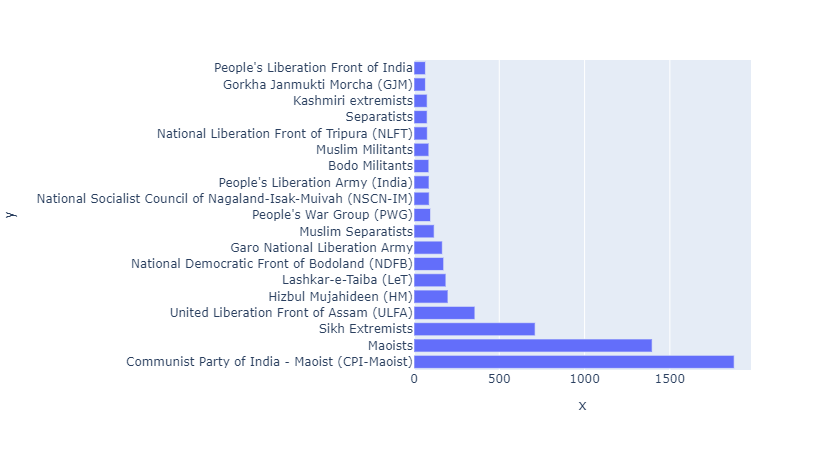

In [55]:
fig=px.bar(india_data,x=india_data.Group.value_counts()[1:20].values,y=india_data.Group.value_counts()[1:20].index)
fig.show()

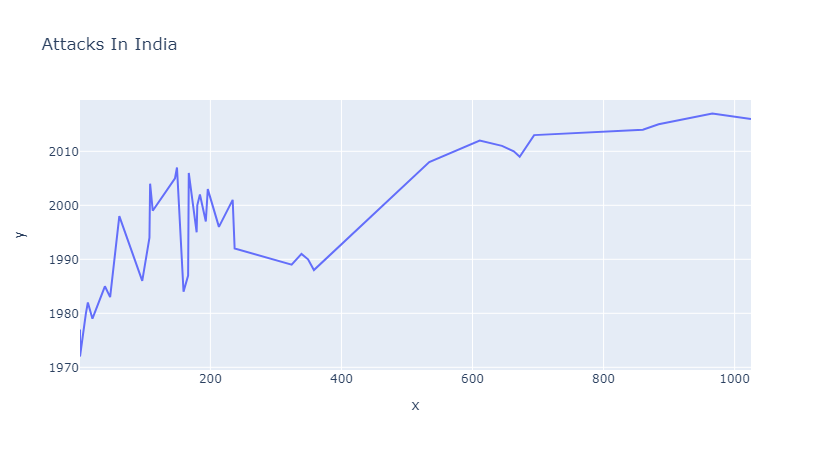

In [63]:
fig = px.line(india_data, x=india_data.Year.value_counts().values, y=india_data.Year.value_counts().index, title='Attacks In India ')
fig.show()

In [65]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# import plotly.express as px

# df = px.data.gapminder()
# all_continents = df.continent.unique()

# app = dash.Dash(__name__)

# app.layout = html.Div([
#     dcc.Checklist(
#         id="checklist",
#         options=[{"label": x, "value": x} 
#                  for x in all_continents],
#         value=all_continents[3:],
#         labelStyle={'display': 'inline-block'}
#     ),
#     dcc.Graph(id="line-chart"),
# ])

# @app.callback(
#     Output("line-chart", "figure"), 
#     [Input("checklist", "value")])
# def update_line_chart(continents):
#     mask = df.continent.isin(continents)
#     fig = px.line(df[mask], 
#         x="year", y="lifeExp", color='country')
#     return fig

# app.run_server(debug=True)

In [66]:
x=india_data.Year.value_counts().values
y=india_data.Year.value_counts().index

fig = go.Figure(data=go.Scatter(x, y))
fig.show()

ValueError: The first argument to the plotly.graph_objs.Scatter 
constructor must be a dict or 
an instance of :class:`plotly.graph_objs.Scatter`